# Python for Data Science, Level I
### *Session \#10*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Basic Linear Regression

### Warm Ups

---

**Import libraries and read in dataset:**

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

housing_df = pd.read_csv("housing_prices.csv")

**Create a linear model:** `model = LinearRegression()`

**Manually set the y-intercept of the model:** `model.intercept_ = 6000.0`

**Manually set the coefficient(s) of the model:** `model.coef_ = np.array([3000.0])` 

**Make prediction column using your linear model:** `housing_df['predicted_price'] = model.predict(housing_df[['distance_to_city']])`

**Plot your data and model:**
    
```python
axes = housing_df.plot(kind='scatter', x='distance_to_city', y='median_price', color='black')
housing_df.plot(x='distance_to_city', y='predicted_price', ax=axes)
fig = plt.gcf()
```

### Exercises
---

**1. Create a scatter plot with** `avg_num_rooms` **as the x-axis and** `median_price` **as y-axis**

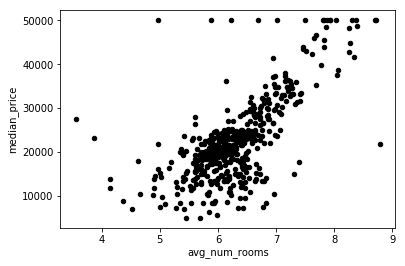

In [41]:
axes = housing_df.plot(kind='scatter', x='avg_num_rooms', y='median_price', color='black')
fig = plt.gcf()

**2. Create a** `LinearRegression` **model and manually set the intercept and coefficient.**

Hint: Try setting the intercept around `-35000` and the coefficient around `6000`.

In [42]:
model = LinearRegression()
model.intercept_ = -35000
model.coef_ = np.array([6000])

**3. Assign** `housing_df['predicted_price']` **to the output of** `model.predict()` **called on** `avg_num_rooms`

Hint: Remember that `model.predict()` expects a dataframe, not a column. 

In [43]:
housing_df['predicted_price'] = model.predict(housing_df[['avg_num_rooms']])

**4. Create a line plot with** `predicted_price` **as the y-axis and** `avg_num_rooms` **as the x-axis. Make sure your new line plot is overlayed on top of your data points from exercise 1.** 

Hint: `.plot` uses a line plot by default. Remember to use `fig` to see the updated image of your graph.

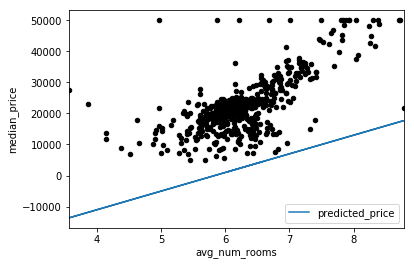

In [44]:
housing_df.plot(x='avg_num_rooms', y='predicted_price', ax=axes)
fig

**5. Let's figure out which line has "best fit"! Write a function** `squared_error()` **that first takes two columns and finds the difference between each corresponding element. It should then square each difference and return the sum.**

Hint: No looping needed -- you can use subtraction on the columns themselves, thanks to Numpy element-wise operations.

In [45]:
def squared_error(col1, col2):
    error = col1 - col2
    error_squared = error**2
    return error_squared.sum()

**6. Use** `squared_error()` **on the columns** `median_price` **and** `predicted_price` **to see how well your line fits the data. This will be a BIG number -- don't worry! Tweak the intercept and coefficient, to see how it improves or degrades the fit of your line.**

In [46]:
squared_error(housing_df['median_price'], housing_df['predicted_price'])

223334445692.0

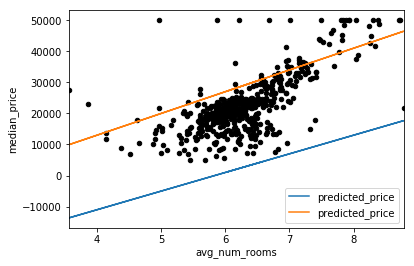

In [47]:
model.intercept_ = -15000
model.coef_ = np.array([7000])
housing_df['predicted_price'] = model.predict(housing_df[['avg_num_rooms']])
housing_df.plot(x='avg_num_rooms', y='predicted_price', ax=axes)
fig

In [48]:
squared_error(housing_df['median_price'], housing_df['predicted_price'])

44277317703.0

**7. Use** `model.fit()` **on** `avg_num_rooms` **and** `median_price` **to automatically optimize your linear model according to squared error. Repeat the steps from exercise 3 and 4 to overwrite** `predicted_price` **using your optimized model and graph the results.**

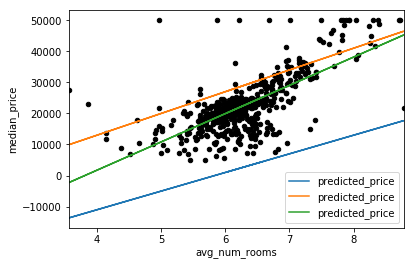

In [49]:
model.fit(housing_df[['avg_num_rooms']], housing_df['median_price'])
housing_df['predicted_price'] = model.predict(housing_df[['avg_num_rooms']])
housing_df.plot(x='avg_num_rooms', y='predicted_price', ax=axes)
fig

## II. Multilinear Regression

### Warm Ups
---

**Training a model with multiple features:** 

```python
columns = ['avg_num_rooms', 'student_teacher_ratio', 'nitrous']
model.fit(housing_df[columns], housing_df['median_price'])
```

**Prediction with multiple features:** `model.predict(housing_df[columns])`

**Compute mean squared error:** `mean_squared_error(housing_df['median_price'], housing_df['predicted_price'])`

**Compute R2 score:** `r2_score(housing_df['median_price'], housing_df['predicted_price'])`

### Exercises
---

**1. What is the mean squared error and R2 score for your single-variable linear model for** `median_price`?
   

In [50]:
mean_squared_error(housing_df['median_price'], housing_df['predicted_price'])

43600551.77116957

**2. Retrain your model using the three features you think are most important to home price, and overwrite the** `predicted_price` **column using your new model.**

In [53]:
columns = ['distance_to_city', 'charles_river', 'nitrous']
model.fit(housing_df[columns], housing_df['median_price'])
housing_df['predicted_price'] = model.predict(housing_df[columns])

**3. What is the mean squared error and R2 score for your new three-variable linear model for median_price?**

In [54]:
mean_squared_error(housing_df['predicted_price'], housing_df['median_price'])

64007903.5200417

**4. Retrain your model using all available column data, and overwrite the predicted_price column using your new model. What are your mean squared error and R2 score now?**

Hint: Don't forget to remove the `median price` and `predicted price` columns! Those are forms of the answer, which you do not want to train on. 

In [65]:
answer_columns = ['median_price', 'predicted_price']
data_df = housing_df.drop(answer_columns, axis=1)

model.fit(data_df, housing_df['median_price'])
housing_df['predicted_price'] = model.predict(data_df)

print(f"Mean squared error: {mean_squared_error(housing_df['predicted_price'], housing_df['median_price'])")
print(f"r2_score(housing_df['predicted_price'], housing_df['median_price']))

27831938.401887726
0.5081620413366179


**5. Output the coefficients of the linear model using** `.coef_`, **and take their absolute value. The function** `np.argmin()` **will give you the index of the smallest value in the coefficients? Which feature does this correspond to?**

In [64]:
column_index = np.argmin(abs(model.coef_))
data_df.columns[column_index]

'tax_rate'

**4. Drop the corresponding column and retrain your model. How does this affect the r2 score and mean_squared_error?** 

In [ ]:
smaller_df = data_df.drop('tax_rate', axis=1)
model.fit(smaller_df, housing_df['median_price'])
housing_df['predicted_price'] = model.predict(smaller_df)
mean_squared_error(housing_df['predicted_price'], housing_df['median_price'])
r2_score(housing_df['predicted_price'], housing_df['median_price'])

## III. Linear Regression Assumptions

### Warm Ups
---

**Use a scatter plot to check for linearity and equal variance:** 
```python
axes = housing_df.plot(kind='scatter', x='nitrous', y='median_price', color='black')
fig = plt.gcf()
```

**Use a correlation matrix to check for dependence between variables:** `housing_df.corr()`

**Create a histogram of a column** 
```python
axes = housing_df['error'].plot(kind='hist', bins=50)
fig = plt.gcf()
```

### Exercises
---

**1. Check the correlation matrix for** `housing_df` **to find features that are more than 90% correlated**

In [66]:
housing_df.corr()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price,predicted_price
crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.388305,-0.474278
big_lots_percent,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.360445,0.440251
office_percent,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.483725,-0.590826
charles_river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.175260,0.214064
nitrous,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.427321,-0.521933
avg_num_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.695360,0.849318
pre_1940,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.376955,-0.460415
distance_to_city,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.249929,0.305265
highway_access,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.381626,-0.466121
tax_rate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.468536,-0.572274


**2. Use a scatter plot to check linearity and equal variance for** `avg_num_rooms` **and** `student_teacher_ratio`. **Which of these is a better indicator for price?** 

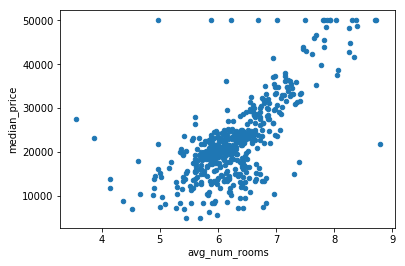

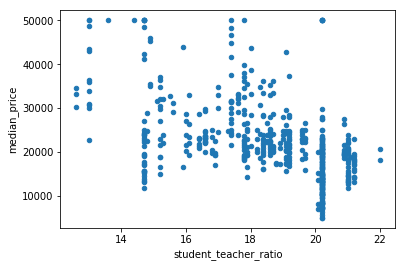

In [67]:
housing_df.plot(kind='scatter', x='avg_num_rooms', y='median_price')
housing_df.plot(kind='scatter', x='student_teacher_ratio', y='median_price')

# Average number of rooms is a better indicator based on linear pattern and consistent variance

**3. Create a column called** `error` **which is the difference between** `predicted_price` **and** `median_price`.

In [68]:
housing_df['error'] = housing_df['predicted_price'] - housing_df['median_price']

**4. Create a histogram of the** `error` **column. Is it normal, and centered on 0?**

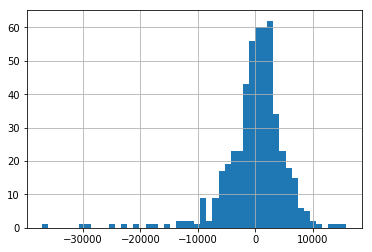

In [69]:
housing_df['error'].hist(bins=50)

# Yes, error appears normally distributed